# SYDE 556/750 --- Assignment 4
**Student ID: 20765155**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/tcstewar/syde556-f21/raw/master/assignments/assignment_04/syde556_assignment_04.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import nengo and some helper functions for Q1
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.utils.connection import eval_point_decoding

# Fix the numpy random seed for reproducible results
np.random.seed(18945)
seed = np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Building an ensemble of neurons

**a) Tuning curves.** Plot the population tuning curves. Plot the representation accuracy plot ($x - \hat{x}$). Compute and report the RMSE.

In [2]:
def RMSE(y1, y2):
    return np.sqrt(np.mean(np.square(y1 - y2)))

def plot(title, xlabel, ylabel, x, y):
    plt.figure()
    plt.title(title)
    plt.plot(x, y)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

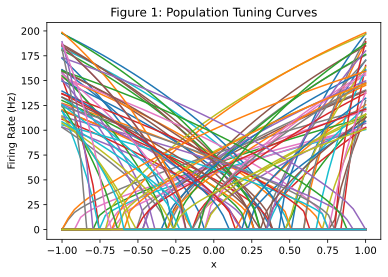

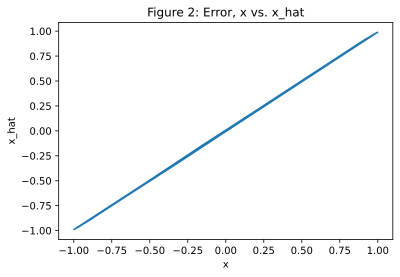

RMSE:  0.0032990643928493117


In [3]:
# Define Variables
n_neurons=100
encoders=[-1, 1]
t_rc=0.020
t_ref=0.002
dimensions=1
min=100
max=200

# Create ensemble
network = nengo.Network(label="1-Dim Ensemble", seed=seed)
LIFRate = nengo.LIFRate(tau_rc=t_rc, tau_ref=t_ref)
with network:
    ensemble = nengo.Ensemble(
        n_neurons=n_neurons,
        dimensions=dimensions,
        max_rates=nengo.dists.Uniform(min, max),
        neuron_type=LIFRate,
    )
    connection = nengo.Connection(ensemble, ensemble)

# Create simulation
simulation = nengo.Simulator(network)

# Create tuning curves
x, A = tuning_curves(ensemble, simulation)

# Eval point decoding
eval_points, targets, x_hat = eval_point_decoding(connection, simulation)

# Find RMSE
rmse_1 = RMSE(targets, x_hat)

# Plot tuning curves
plot("Figure 1: Population Tuning Curves", "x", "Firing Rate (Hz)", x, A)

# Plot error
plot("Figure 2: Error, x vs. x_hat", "x", "x_hat", targets, x_hat)

# Prinr RMSE
print("RMSE: ", rmse_1)

**b) RMSE and radius.** Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Make sure your neurons have the same (relative, i.e., scaled by the radius) $x$-intercepts and maximum rates across all experiments.

In [4]:
radii = [0.5, 1, 2, 4]
rmse = []

for r in radii:
    ensemble.radius = r
    simulation = nengo.Simulator(network)
    x, A = tuning_curves(ensemble, simulation)
    eval_points, targets, x_hat = eval_point_decoding(connection, simulation)
    rmse = RMSE(x, x_hat)
    print("RMSE for radius " , r, " = ", rmse)
    rmse.push(rmse)

plot("Figure 3: Radius vs RMSE", "radius", "RMSE", radii, rmse)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

ValueError: operands could not be broadcast together with shapes (50,1) (750,1) 

**c) Discussion.** What mathematical relationship between the radius and the RMSE do you observe (write down an equation)? Explain why this is the case.

✍ \<YOUR SOLUTION HERE\>

**d) RMSE and refractory period.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{ref}$ changes between $1$ and $5\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{ref}$ and produce a plot showing the RMSE over $\tau_\mathrm{ref}$. Again, make sure to use the same neuron ensemble parameters in all your trials.

In [ ]:
t_refs = [1, 2, 3, 4, 5]
rmse = []

for t in t_refs:
    network = nengo.Network(label="1-Dim Ensemble", seed=seed)
    LIFRate = nengo.LIFRate(tau_rc=t_rc, tau_ref=t/1000)
    with network:
        ensemble = nengo.Ensemble(
        n_neurons=n_neurons,
        dimensions=dimensions,
        max_rates=nengo.dists.Uniform(min, max),
        neuron_type=LIFRate,
        )
        connection = nengo.Connection(ensemble, ensemble)

    # Create simulation
    simulation = nengo.Simulator(network)
    x, A = tuning_curves(ensemble, simulation)
    eval_points, targets, x_hat = eval_point_decoding(connection, simulation)
    rmse = RMSE(x, x_hat)
    print("RMSE for t_ref" , t, " = ", rmse)
    rmse.push(rmse)

plot("Figure 4: t_ref vs RMSE", "t_ref", "RMSE", t_refs, rmse)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

ValueError: operands could not be broadcast together with shapes (50,1) (750,1) 

**e) RMSE and membrane time constant.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{RC}$ changes between $10$ and $100\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{RC}$ and produce a plot showing the RMSE over $\tau_\mathrm{RC}$.  Again, make sure to use the same neuron ensemble parameters in all your trials.

In [ ]:
t_rcs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
rmse = []

for t in t_rcs:
    network = nengo.Network(label="1-Dim Ensemble", seed=seed)
    LIFRate = nengo.LIFRate(tau_rc=t/1000, tau_ref=t_ref)
    with network:
        ensemble = nengo.Ensemble(
        n_neurons=n_neurons,
        dimensions=dimensions,
        max_rates=nengo.dists.Uniform(min, max),
        neuron_type=LIFRate,
        )
        connection = nengo.Connection(ensemble, ensemble)

    # Create simulation
    simulation = nengo.Simulator(network)
    x, A = tuning_curves(ensemble, simulation)
    eval_points, targets, x_hat = eval_point_decoding(connection, simulation)
    rmse = RMSE(x, x_hat)
    print("RMSE for t_rc " , t, " = ", rmse)
    rmse.push(rmse)

plot("Figure 5: t_rc vs RMSE", "t_rc", "RMSE", t_rcs, rmse)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

ValueError: operands could not be broadcast together with shapes (50,1) (750,1) 

**f) Discussion.** Discuss the last two results. Describe what happens to the tuning curves as $\tau_\mathrm{ref}$ and $\tau_\mathrm{RC}$ change (you do not need to come up with a mathematical relationship here). Explain why the change in tuning curve shape influences the RMSE in the way you observe.

✍ \<YOUR SOLUTION HERE\>

# 2. Connecting neurons

**a) Computing the identity function.** Show the input value and the decoded values from the two  ensembles in three separate plots. Run the simulation for $0.5\,\mathrm{s}$.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

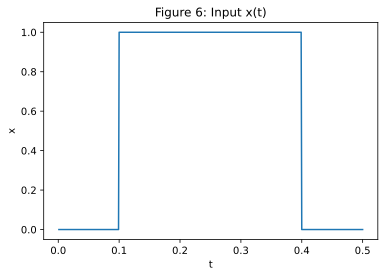

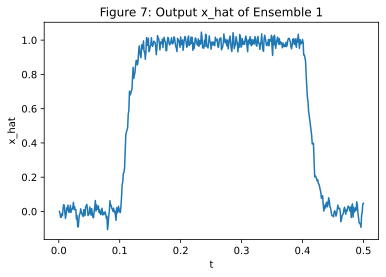

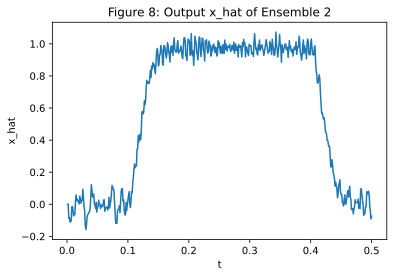

In [ ]:
n_neurons = 100
n_neurons2 = 50

step_fn = lambda t: 0 if t < 0.1 else (1.0 if t < 0.4 else 0)

model = nengo.Network(label="1-Dim Ensemble", seed=seed)

with model:
    x = nengo.Node(step_fn)
    ensemble1 = nengo.Ensemble(
        n_neurons=n_neurons,
        dimensions=dimensions,
        max_rates=nengo.dists.Uniform(min, max),
    )
    ensemble2 = nengo.Ensemble(
        n_neurons=n_neurons2,
        dimensions=dimensions,
        max_rates=nengo.dists.Uniform(min, max),
    )
    x_to_ensemble_1 = nengo.Connection(x, ensemble1)
    ens_1_to_ens_2 = nengo.Connection(ensemble1, ensemble2, synapse=10 / 1000)
    probe_x = nengo.Probe(x)
    probe_1 = nengo.Probe(ensemble1, synapse=10 / 1000)
    probe_2 = nengo.Probe(ensemble2, synapse=10 / 1000)

simulation = nengo.Simulator(model)
simulation.run(0.5)
t = simulation.trange()

plot("Figure 6: Input x(t)", "t", "x", t, simulation.data[probe_x])
plot("Figure 7: Output x_hat of Ensemble 1", "t", "x_hat", t, simulation.data[probe_1])
plot("Figure 8: Output x_hat of Ensemble 2", "t", "x_hat", t, simulation.data[probe_2])

**b) Computing an affine transformation.** Make a new version of the model where instead of computing the identity function, it computes $y(t) = 1 - 2x(t)$. Show the same graphs as in part (a).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

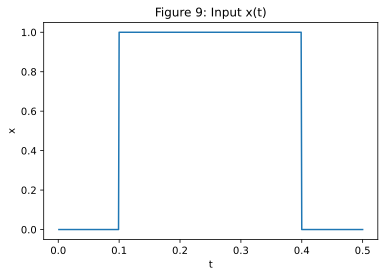

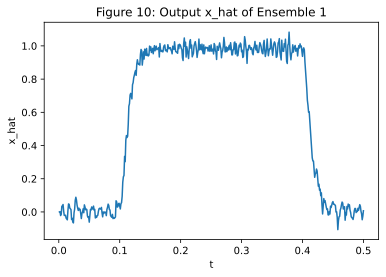

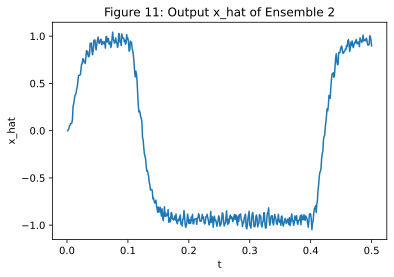

In [ ]:
step_fn = lambda t: 0 if t < 0.1 else (1.0 if t < 0.4 else 0)
computing_func = lambda x: 1 - 2 * x

model = nengo.Network(label="1-Dim Ensemble", seed=seed)

with model:
    x = nengo.Node(step_fn)
    ensemble1 = nengo.Ensemble(
        n_neurons=n_neurons,
        dimensions=dimensions,
        max_rates=nengo.dists.Uniform(min, max),
    )
    ensemble2 = nengo.Ensemble(
        n_neurons=n_neurons2,
        dimensions=dimensions,
        max_rates=nengo.dists.Uniform(min, max),
    )
    x_to_ensemble_1 = nengo.Connection(x, ensemble1)
    ens_1_to_ens_2 = nengo.Connection(ensemble1, ensemble2, synapse=10 / 1000, function=computing_func)
    probe_x = nengo.Probe(x)
    probe_1 = nengo.Probe(ensemble1, synapse=10 / 1000)
    probe_2 = nengo.Probe(ensemble2, synapse=10 / 1000)

simulation = nengo.Simulator(model)
simulation.run(0.5)
t = simulation.trange()

plot("Figure 9: Input x(t)", "t", "x", t, simulation.data[probe_x])
plot("Figure 10: Output x_hat of Ensemble 1", "t", "x_hat", t, simulation.data[probe_1])
plot("Figure 11: Output x_hat of Ensemble 2 Computing the Function y(t) = 1 - 2x(t)", "t", "x_hat", t, simulation.data[probe_2])

# 3. Dynamics

**a) Transforming the dynamical system.** Rewrite the linear dynamical system describing the integrator in terms of $\frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}$, i.e., write down the matrices $\mathbf{A}$ and $\mathbf{B}$ (you can just use the equations from class, you do not have to re-derive the equations) What are the matrices $\mathbf{A}'$ and $\mathbf{B}'$ we have to use when implementing this system using the recurrent connection post-synaptic filter?

$$ A = \frac{1}{\tau}(A'-I) $$
$$ B = \frac{1}{\tau}B' $$

$$ A' = \tau A + I $$
$$ B' = \tau B $$

**b) Integrator using spiking neurons.**  Show the input, the ideal integral, and the value represented by the ensemble when the input is a value of $0.9$ from $t=0.04$ to $t=1.0$ (and $0$ for other times). Run the simulation for $1.5\,\mathrm{s}$.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

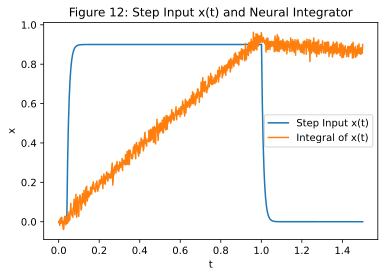

In [ ]:
n = 200

step_fn = lambda t: 0.9 if t >= 0.04 and t <= 1.0 else 0

model = nengo.Network(label="Neural Integrator", seed=seed)

def function(x):
    return 1 * x

with model:
    x = nengo.Node(step_fn)
    ensemble = nengo.Ensemble(
        n_neurons=n,
        dimensions=1,
        max_rates=nengo.dists.Uniform(min, max),
    )
    x_to_ensemble = nengo.Connection(x, ensemble, transform = 0.05, synapse = 0.005)
    ens_to_ens = nengo.Connection(ensemble, ensemble, function=function, synapse=0.05)
    probe_x = nengo.Probe(x, synapse=0.01)
    probe_1 = nengo.Probe(ensemble, synapse=0.01)

simulation = nengo.Simulator(model)
simulation.run(1.5)
t = simulation.trange()

plt.figure()
plt.title("Figure 12: Step Input x(t) and Neural Integrator")
plt.plot(t, simulation.data[probe_x])
plt.plot( t, simulation.data[probe_1])
plt.xlabel("t")
plt.ylabel("x")
plt.legend(["Step Input x(t)", "Integral of x(t)"])



**c) Discussion.** What is the expected ideal result, i.e., if we just mathematically computed the integral of the input, what is the equation describing the integral? How does the simulated output compare to that ideal?

$$ t < 0.04: $$
$$ u(t) = 0 \implies \int_{-\infty}^{0.04} u(t)dt = 0 $$

$$ 0.04 < t < 1: $$
$$ u(t) = 1 \implies \int_{0.04}^{1} u(t)dt = \int_{0.04}^{1} 1dt = [ x ]0.04, 1 = 1 - 0.04 = 0.96 $$


$$ 1 < t : $$
$$ u(t) = 0 \implies \int_{1}^{\infty} u(t)dt = 0 $$

$$

**d) Simulation using rate neurons.** Change the neural simulation to rate mode. Re-run the simulation in rate mode. Show the resulting plots.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

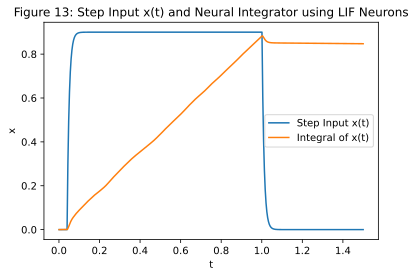

In [ ]:
n = 200

step_fn = lambda t: 0.9 if t >= 0.04 and t <= 1.0 else 0

model = nengo.Network(label="Rate Neuron Neural Integrator", seed=seed)

def function(x):
    return 1 * x

with model:
    x = nengo.Node(step_fn)
    ensemble = nengo.Ensemble(
        n_neurons=n,
        dimensions=1,
        max_rates=nengo.dists.Uniform(min, max),
        neuron_type=nengo.LIFRate()
    )
    x_to_ensemble = nengo.Connection(x, ensemble, transform = 0.05, synapse = 0.005)
    ens_to_ens = nengo.Connection(ensemble, ensemble, function=function, synapse=0.05)
    probe_x = nengo.Probe(x, synapse=0.01)
    probe_1 = nengo.Probe(ensemble, synapse=0.01)

simulation = nengo.Simulator(model)
simulation.run(1.5)
t = simulation.trange()

plt.figure()
plt.title("Figure 13: Step Input x(t) and Neural Integrator using LIF Neurons")
plt.plot(t, simulation.data[probe_x])
plt.plot( t, simulation.data[probe_1])
plt.xlabel("t")
plt.ylabel("x")
plt.legend(["Step Input x(t)", "Integral of x(t)"])



**e) Discussion.** How does this compare to the result in part (b)? What deviations from the ideal do you still observe? Where do those deviations come from?

Compared to the result in part b, the neural integrator in part c) is significantly less noisy. This is due to the inherent smoothing of LIF Neuron approximation when compared to spikes. The integrator also seems to "stop integrating" without much lag exacty when the step input drops off. We can see that the integrator slightly underestimates the integral of the input due to smoothing. Deviations can still be observed at around t = 0.0 and t = 1.0 when there is a sharp change in the step input. 

**f) Integration of a shorter input pulse.** Returning to spiking mode, change the input to be a value of $0.9$ from $t=0.04$ to $0.16$. Show the same plots as before (the input, the ideal, and the value represented by the ensemble over $1.5\,\mathrm{s}$).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

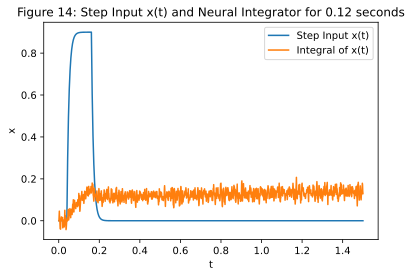

In [ ]:
n = 200

step_fn = lambda t: 0.9 if t >= 0.04 and t <= 0.16 else 0

model = nengo.Network(label="Short Pulse Neural Integrator", seed=seed)

def function(x):
    return 1 * x

with model:
    x = nengo.Node(step_fn)
    ensemble = nengo.Ensemble(
        n_neurons=n,
        dimensions=1,
        max_rates=nengo.dists.Uniform(min, max),
    )
    x_to_ensemble = nengo.Connection(x, ensemble, transform = 0.05, synapse = 0.005)
    ens_to_ens = nengo.Connection(ensemble, ensemble, function=function, synapse=0.05)
    probe_x = nengo.Probe(x, synapse=0.01)
    probe_1 = nengo.Probe(ensemble, synapse=0.01)

simulation = nengo.Simulator(model)
simulation.run(1.5)
t = simulation.trange()

plt.figure()
plt.title("Figure 14: Step Input x(t) and Neural Integrator for 0.12 seconds")
plt.plot(t, simulation.data[probe_x])
plt.plot( t, simulation.data[probe_1])
plt.xlabel("t")
plt.ylabel("x")
plt.legend(["Step Input x(t)", "Integral of x(t)"])

**g) Discussion.** How does this compare to (b)? What is the ideal equation? Does it work as intended? If not, why is it better or worse?

Compared to b), this integrator preforms much worse. The amount of noise appears to be roughly equal, but the integrator function does a poor job of approximating the actual integral of the input. The impulse is so short and its value rises so steeply that the integrator cannot reach the "peak" value before the signal returns to 0. 

**h) Input ramp.** Change the input to a ramp input from $0$ to $0.9$ from $t=0$ to $t=0.45$ (and $0$ for $t>0.45$). Show the same plots as in the previous parts of this question.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

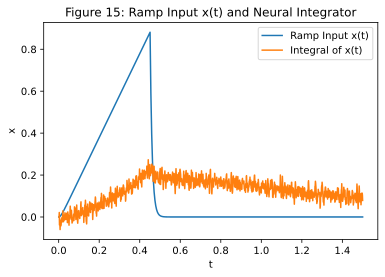

In [ ]:
n = 200

step_fn = lambda t: 2*t if t >= 0 and t <= 0.45 else 0

model = nengo.Network(label="Ramp Input Neural Integrator", seed=seed)

def function(x):
    return 1 * x

with model:
    x = nengo.Node(step_fn)
    ensemble = nengo.Ensemble(
        n_neurons=n,
        dimensions=1,
        max_rates=nengo.dists.Uniform(min, max),
    )
    x_to_ensemble = nengo.Connection(x, ensemble, transform = 0.05, synapse = 0.005)
    ens_to_ens = nengo.Connection(ensemble, ensemble, function=function, synapse=0.05)
    probe_x = nengo.Probe(x, synapse=0.01)
    probe_1 = nengo.Probe(ensemble, synapse=0.01)

simulation = nengo.Simulator(model)
simulation.run(1.5)
t = simulation.trange()

plt.figure()
plt.title("Figure 15: Ramp Input x(t) and Neural Integrator")
plt.plot(t, simulation.data[probe_x])
plt.plot( t, simulation.data[probe_1])
plt.xlabel("t")
plt.ylabel("x")
plt.legend(["Ramp Input x(t)", "Integral of x(t)"])

**i) Discussion.** What does the ensemble end up representing, and why? What is the (ideal) equation for the curve traced out by the ensemble?

✍The ensemble represents a quadratic function. This makes sense because a quadratic is an integral of a linear function, and the step input is linear. The equation of the line drawn by the step input is y=2t so the ideal curve is the integral of 2t: y*= t^2.

**j) Sinusoidal input.** Change the input to $5\sin(5t)$. Show the same plots as before.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

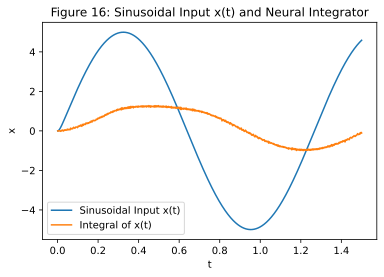

In [ ]:
n = 200

sin_fn = lambda t: 5*np.sin(5*t)
cos_fn = lambda t: -np.cos(5*t)
model = nengo.Network(label="Sinusoidal Input Neural Integrator", seed=seed)

def function(x):
    return 1 * x

with model:
    x2 = nengo.Node(cos_fn)
    x = nengo.Node(sin_fn)
    ensemble = nengo.Ensemble(
        n_neurons=n,
        dimensions=1,
        max_rates=nengo.dists.Uniform(min, max),
    )
    x_to_ensemble = nengo.Connection(x, ensemble, transform = 0.05, synapse = 0.005)
    ens_to_ens = nengo.Connection(ensemble, ensemble, function=function, synapse=0.05)
    probe_x = nengo.Probe(x, synapse=0.01)
    probe_1 = nengo.Probe(ensemble, synapse=0.01)
    probe_2 = nengo.Probe(x2, synapse=0.01)

simulation = nengo.Simulator(model)
simulation.run(1.5)
t = simulation.trange()

plt.figure()
plt.title("Figure 16: Sinusoidal Input x(t) and Neural Integrator")
plt.plot(t, simulation.data[probe_x])
plt.plot( t, simulation.data[probe_1])
plt.xlabel("t")
plt.ylabel("x")
plt.legend(["Sinusoidal Input x(t)", "Integral of x(t)"])

**k) Discussion.** What should the value represented by the ensemble be? Write the equation. How well does it do? What are the differences between the model's behaviour and the expected ideal behaviour and why do these differences occur?

The integral of y = 5sin5(t) is: y* = −cos(5t). As seen in Figure 17 below, the neural integrator is slightly nosier than the ideal equation and has slight overshoot. It also is somewhat phase shifted because of the time taken for the integrator to "ramp up". However, it is visually apparent that the integrator is adequately representing the amplitude and period of the ideal function with moderate error. 

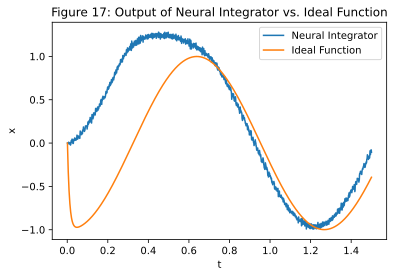

In [ ]:

plt.figure()
plt.title("Figure 17: Output of Neural Integrator vs. Ideal Function")
plt.plot(t, simulation.data[probe_1])
plt.plot( t, simulation.data[probe_2])
plt.plot()
plt.xlabel("t")
plt.ylabel("x")
plt.legend(["Neural Integrator", "Ideal Function"])

**l) 🌟 Bonus question.** Implement a nonlinear dynamical system we have not seen in class (and that is not in the book). Demonstrate that it's working as expected

✍ \<YOUR SOLUTION HERE\>

In [ ]:
# ✍ <YOUR SOLUTION HERE>